## EDA of Goodreads 


# Table of Contents 
<ol start="0">
<li> Learning Goals </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Books  </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Goals

About 6000 odd "best books" were fetched and parsed from [Goodreads](https://www.goodreads.com). The "bestness" of these books came from a proprietary formula used by Goodreads and published as a list on their web site.

We parsed the page for each book and saved data from all these pages in a tabular format as a CSV file. In this lab we'll clean and further parse the data.  We'll then do some exploratory data analysis to answer questions about these best books and popular genres.  


By the end of this lab, you should be able to:

- Load and systematically address missing values, ancoded as `NaN` values in our data set, for example, by removing observations associated with these values.
- Parse columns in the dataframe to create new dataframe columns.
- Create and interpret visualizations to explore the data set


### Basic EDA workflow

(From the lecture, repeated here for convenience).

The basic workflow is as follows:

1. **Build** a DataFrame from the data (ideally, put all data in this object)
2. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
3. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
4. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## Part 1: Loading and Cleaning with Pandas 
Read in the `goodreads.csv` [csv](https://drive.google.com/file/d/14fmorPiVQb5y2dxWpinB5Ju_apuy5pe9/view) file, examine the data, and do any necessary data cleaning. 

Here is a description of the columns (in order) present in this csv file:

```
rating: the average rating on a 1-5 scale achieved by the book
review_count: the number of Goodreads users who reviewed this book
isbn: the ISBN code for the book
booktype: an internal Goodreads identifier for the book
author_url: the Goodreads (relative) URL for the author of the book
year: the year the book was published
genre_urls: a string with '|' separated relative URLS of Goodreads genre pages
dir: a directory identifier internal to the scraping code
rating_count: the number of ratings for this book (this is different from the number of reviews)
name: the name of the book
```

Report all the issues you found with the data and how you resolved them.  

[15 minutes]

----

Load the appropriate libraries

In [213]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

In [214]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Cleaning: Reading in the data
We read in and clean the data from `goodreads.csv`.  Try directly loading the data from file and see what the dataframe look like. What's the problem with naively loading the data as is? You might want to open the CSV file in Excel or your favorite text editor to see how this dataset is formatted.

In [215]:
#Read the data into a dataframe
path="/content/drive/MyDrive/###Submissions/Intro to Data Science/module_7/goodreads.csv"
df = pd.read_csv(path)

#Examine the first couple of rows of the dataframe
####### 
#   Insert your code
####### 
df.head()

,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.Suzanne_Collins,2008,/genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
0,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
1,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
2,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
3,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice
4,4.25,12363,0446675539,good_reads:book,https://www.goodreads.com/author/show/11081.Ma...,1936.0,/genres/classics|/genres/historical-fiction|/g...,dir01/18405.Gone_with_the_Wind.html,645470,Gone with the Wind


Lets read the csv file with custom column descriptions specified in the problem statement.

In [216]:
df=pd.read_csv(path, header=None,
               names=["rating", 'review_count', 'isbn', 'booktype',
                      'author_url', 'year', 'genre_urls', 'dir','rating_count', 'name'])

#Examine the first couple of rows of the dataframe
####### 
#   Insert your code
####### 
df.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice


### Cleaning: Examing the dataframe - quick checks

We should examine the dataframe to get a overall sense of the content.

In [217]:
#Start by check the column data types
####### 
#   Insert your code
####### 
df.dtypes

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

There are a couple more quick sanity checks to perform on the dataframe. 

In [218]:
#Come up with a few other important properties of the dataframe to check
####### 
#   Insert your code
####### 
df.describe

<bound method NDFrame.describe of       rating review_count        isbn         booktype                                         author_url    year                                         genre_urls                                                dir rating_count                                               name
0       4.40       136455  0439023483  good_reads:book  https://www.goodreads.com/author/show/153394.S...  2008.0  /genres/young-adult|/genres/science-fiction|/g...                dir01/2767052-the-hunger-games.html      2958974            The Hunger Games (The Hunger Games, #1)
1       4.41        16648  0439358078  good_reads:book  https://www.goodreads.com/author/show/1077326....  2003.0  /genres/fantasy|/genres/young-adult|/genres/fi...  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...      1284478  Harry Potter and the Order of the Phoenix (Har...
2       3.56        85746  0316015849  good_reads:book  https://www.goodreads.com/author/show/941441.S...  2005.0  /genres/you

Was the data read correctly and values represented as we expected?

A: No only float was read.

### Cleaning: Examining the dataframe - a deeper look

Beyond performing checking some quick general properties of the data frame and looking at the first $n$ rows, we can dig a bit deeper into the values being stored. If you haven't already, check to see if there are any missing values in the data frame.

In [219]:
#Get a sense of how many missing values there are in the dataframe.
####### 
#   Insert your code
####### p
missing=[]
for i in range(len(df)):
  if df.iloc[i].isna().any():
    missing.append(i)


df.iloc[missing,:]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
16,3.92,38061,NaN,good_reads:book,https://www.goodreads.com/author/show/498072.A...,2003.0,/genres/fiction|/genres/romance|/genres/fantas...,dir01/18619684-the-time-traveler-s-wife.html,927254,The Time Traveler's Wife
49,3.85,11628,NaN,good_reads:book,https://www.goodreads.com/author/show/5152.Vla...,1955.0,/genres/classics|/genres/fiction|/genres/liter...,dir01/7604.Lolita.html,374886,Lolita
85,4.16,14968,NaN,good_reads:book,https://www.goodreads.com/author/show/137902.R...,2007.0,/genres/young-adult|/genres/teen|/genres/young...,dir01/18660669-vampire-academy.html,297022,"Vampire Academy (Vampire Academy, #1)"
116,3.92,8393,NaN,good_reads:book,https://www.goodreads.com/author/show/957894.A...,1942.0,/genres/classics|/genres/fiction|/genres/philo...,dir02/49552.The_Stranger.html,307566,The Stranger
156,4.03,3473,NaN,good_reads:book,https://www.goodreads.com/author/show/4785.Ale...,1843.0,/genres/classics|/genres/fiction|/genres/histo...,dir02/7190.The_Three_Musketeers.html,156968,The Three Musketeers
...,...,...,...,...,...,...,...,...,...,...
5972,4.19,1670,NaN,good_reads:book,https://www.goodreads.com/author/show/4586597....,2011.0,/genres/romance|/genres/romance|/genres/contem...,dir60/12351649-perfection.html,35197,"Perfection (Neighbor from Hell, #2)"
5976,4.23,1185,NaN,good_reads:book,https://www.goodreads.com/author/show/5160667....,2014.0,/genres/romance|/genres/science-fiction|/genre...,dir60/20504754-transcendence.html,4942,Transcendence
5977,4.03,218,NaN,good_reads:book,https://www.goodreads.com/author/show/5769580....,1987.0,/genres/fiction|/genres/novels|/genres/literat...,dir60/5948927.html,1607,Ø§ÙØªÙÙ
5991,4.20,650,NaN,good_reads:book,https://www.goodreads.com/author/show/1112683._,2009.0,/genres/novels|/genres/fiction|/genres/religio...,dir60/6976667.html,2899,Ø£ÙÙØ§Ø­ ÙØ¯Ø³Ø±


In [220]:
#Try to locate where the missing values occur
####### 
#   Insert your code
####### 
print("Indexes where missing values occur")
print(missing)

Indexes where missing values occur
[16, 49, 85, 116, 156, 195, 299, 301, 308, 444, 529, 561, 592, 610, 648, 656, 686, 703, 716, 736, 824, 837, 869, 939, 953, 974, 1006, 1007, 1038, 1055, 1072, 1109, 1115, 1125, 1134, 1181, 1190, 1194, 1214, 1227, 1259, 1277, 1328, 1347, 1375, 1377, 1430, 1447, 1468, 1488, 1492, 1496, 1505, 1515, 1524, 1525, 1547, 1561, 1570, 1571, 1588, 1603, 1681, 1689, 1693, 1697, 1702, 1718, 1720, 1725, 1742, 1752, 1753, 1772, 1777, 1791, 1793, 1798, 1836, 1852, 1854, 1857, 1866, 1877, 1879, 1928, 1941, 1942, 1950, 1951, 1958, 1959, 1970, 1978, 1985, 2034, 2053, 2059, 2067, 2069, 2075, 2097, 2108, 2142, 2145, 2154, 2168, 2170, 2171, 2172, 2174, 2175, 2188, 2190, 2192, 2213, 2231, 2249, 2258, 2263, 2284, 2285, 2323, 2331, 2334, 2339, 2360, 2378, 2391, 2442, 2451, 2459, 2468, 2469, 2475, 2476, 2489, 2496, 2511, 2515, 2520, 2521, 2554, 2556, 2563, 2582, 2598, 2599, 2606, 2609, 2615, 2624, 2646, 2649, 2653, 2664, 2672, 2673, 2684, 2685, 2690, 2699, 2704, 2714, 2719, 272

How does `pandas` or `numpy` handle missing values when we try to compute with data sets that include them?

### Cleaning: Dealing with Missing Values
How should we interpret 'missing' or 'invalid' values in the data (hint: look at where these values occur)? One approach is to simply exclude them from the dataframe. Is this appropriate for all 'missing' or 'invalid' values? How would you drop these values from the dataframe (hint: is it possible to eliminate just a single entry in your dataframe? Should you eliminate an entire row? Or column?)?

In [221]:
#Treat the missing or invalid values in your dataframe
####### 
#   Insert your code
####### 
# soemtimes in a continuous data we can interpret the missing values as the max, min or average of the group it belongs to
# but in the case of this dataset ISBN number differs for every book hence it is best to eleimate that column
# eliminating the row which has misisng values will make us lose data corresponding to 500 books out of 6000 books which is a teriiable loss of data.
# df = df.drop('isbn',axis=1)
# df = df.drop('genre_urls',axis=1)
df.at[missing,'isbn'] =""

In [222]:
mis=[]
for i in range(len(df)):
  if df.iloc[i].isna().any():
    mis.append(i)


df.iloc[mis,:]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
953,4.56,27,,good_reads:book,https://www.goodreads.com/author/show/6621980....,2012.0,NaN,dir10/16243767-crossing-the-seas.html,90,Crossing the Seas
1515,4.56,8,,good_reads:book,https://www.goodreads.com/author/show/394525.T...,2013.0,NaN,dir16/18136407-crashing-down-to-earth.html,75,Crashing Down to Earth
1693,4.21,7,,good_reads:book,https://www.goodreads.com/author/show/3110785._,2009.0,NaN,dir17/7425765.html,67,Ð¡Ð»ÑÐ½ÑÐµ Ð½ÐµÐ´Ð¾ÑÐµÐ³Ð°ÐµÐ¼Ð¾
1752,3.85,41,,good_reads:book,https://www.goodreads.com/author/show/7337562....,13.0,NaN,dir18/5548850-the-day-jesus-rode-into-croydon....,94,The Day Jesus Rode Into Croydon
1942,4.66,8,,good_reads:book,https://www.goodreads.com/author/show/7574275....,2014.0,NaN,dir20/19532388-letters-from-your-soul.html,29,Letters from your soul
...,...,...,...,...,...,...,...,...,...,...
5683,4.56,204,,good_reads:book,https://www.goodreads.com/author/show/3097905....,NaN,/genres/fantasy|/genres/young-adult|/genres/ro...,dir57/12474623-tiger-s-dream.html,895,"Tiger's Dream (The Tiger Saga, #5)"
5692,5.00,0,,good_reads:book,https://www.goodreads.com/author/show/5989528....,2012.0,NaN,dir57/14288412-abstraction-in-theory---laws-of...,6,Abstraction In Theory - Laws Of Physical Trans...
5717,4.71,4,,good_reads:book,https://www.goodreads.com/author/show/5838022....,2012.0,NaN,dir58/13741511-american-amaranth.html,14,American Amaranth
5729,4.83,16,,good_reads:book,https://www.goodreads.com/author/show/7058502....,2014.0,NaN,dir58/22312293-the-keeper.html,29,"The Keeper (The Keeper, #5)"


In [223]:
df.at[missing,'genre_urls'] =""

In [224]:
mis=[]
for i in range(len(df)):
  if df.iloc[i].isna().any():
    mis.append(i)


df.iloc[mis,:]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
2442,4.23,526,,good_reads:book,https://www.goodreads.com/author/show/623606.A...,NaN,,dir25/1301625.La_Tahzan.html,4134,La Tahzan
2869,4.61,2,,good_reads:book,https://www.goodreads.com/author/show/8182217....,NaN,,dir29/22031070-my-death-experiences---a-preach...,23,My Death Experiences - A Preacherâs 18 Apoca...
3643,NaN,None,,None,None,NaN,,dir37/9658936-harry-potter.html,None,None
5282,NaN,None,,None,None,NaN,,dir53/113138.The_Winner.html,None,None
5572,3.71,35,,good_reads:book,https://www.goodreads.com/author/show/285658.E...,NaN,,dir56/890680._rase_una_vez_el_amor_pero_tuve_q...,403,Ãrase una vez el amor pero tuve que matarlo. ...
5658,4.32,44,,good_reads:book,https://www.goodreads.com/author/show/25307.Ro...,NaN,,dir57/5533041-assassin-s-apprentice-royal-assa...,3850,Assassin's Apprentice / Royal Assassin (Farsee...
5683,4.56,204,,good_reads:book,https://www.goodreads.com/author/show/3097905....,NaN,,dir57/12474623-tiger-s-dream.html,895,"Tiger's Dream (The Tiger Saga, #5)"


In [259]:
df = df.drop([3643,5282],axis=0) # removed due to all columns being Nan

In [226]:
mis=[]
for i in range(len(df)):
  if df.iloc[i].isna().any():
    mis.append(i)


df.iloc[mis,:]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
2442,4.23,526,,good_reads:book,https://www.goodreads.com/author/show/623606.A...,NaN,,dir25/1301625.La_Tahzan.html,4134,La Tahzan
2869,4.61,2,,good_reads:book,https://www.goodreads.com/author/show/8182217....,NaN,,dir29/22031070-my-death-experiences---a-preach...,23,My Death Experiences - A Preacherâs 18 Apoca...
5572,3.71,35,,good_reads:book,https://www.goodreads.com/author/show/285658.E...,NaN,,dir56/890680._rase_una_vez_el_amor_pero_tuve_q...,403,Ãrase una vez el amor pero tuve que matarlo. ...
5658,4.32,44,,good_reads:book,https://www.goodreads.com/author/show/25307.Ro...,NaN,,dir57/5533041-assassin-s-apprentice-royal-assa...,3850,Assassin's Apprentice / Royal Assassin (Farsee...
5683,4.56,204,,good_reads:book,https://www.goodreads.com/author/show/3097905....,NaN,,dir57/12474623-tiger-s-dream.html,895,"Tiger's Dream (The Tiger Saga, #5)"


In [227]:

df.at[[2442,2869,5572,5658,5683],'year'] = 0 #becoz year was not having any values

In [228]:
mis=[]
for i in range(len(df)):
  if df.iloc[i].isna().any():
    mis.append(i)


df.iloc[mis,:]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name


Ok so we have done some cleaning. Is it enough? 

A: It is not enough as the values that are present are not currently workable, we might have to change categorical values to numerical to work with them.


In [229]:
#Check the column data types again
####### 
#   Insert your code
####### 
df.dtypes

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

Notice the float has not yet changed.
Ok so lets fix those types. If the type conversion fails, we now know we have further problems.

In [230]:
#Convert rating_count, review_count and year to int 
#######
# .Insert your code
#######
int1 =['rating_count','review_count','year']
for i in int1:
  df[i] = df[i].astype(int)



In [231]:
df.dtypes

rating          float64
review_count      int64
isbn             object
booktype         object
author_url       object
year              int64
genre_urls       object
dir              object
rating_count      int64
name             object
dtype: object

Final check

Some of the other colums that should be strings have NaN. 

In [232]:
df.loc[df.genre_urls.isnull(), 'genre_urls']=""
df.loc[df.isbn.isnull(), 'isbn']=""

The output of the above statments need to get 0, if not try to execute from the first because, the data cleaning has not performed accurately.

##  Part 2: Asking Questions
Think of few questions we want to ask and then examine the data and decide if the dataframe contains what you need to address these questions. 

**Example:** Which are the highest rated books? To determine this, you'll only need the data in two columns: `name` and `rating`. The task will be to sort these two columns by the value in `rating`.
[5 min]

In [233]:
df_new = df[['name','rating']]
df_new = df_new.sort_values(by = 'rating',ascending=False)
df_new

,name,rating
1718,An Elephant Is On My House,5.00
2145,A Book About Absolutely Nothing.,5.00
5564,"Untainted (Photographer Trilogy, #3)",5.00
2903,Obscured Darkness (Family Secrets #2),5.00
2909,Family Secrets,5.00
...,...,...
5113,The Jane Austen Book Club,3.01
5844,Mein Kampf,2.97
2609,How To Be A Perfect Girl,2.90
5979,Lost,2.77


---

##  Part 3: Parsing and Completing the Data Frame 

We will need author and genre to proceed! Parse the `author` column from the author_url and `genres` column from the genre_urls. Keep the `genres` column as a string separated by '|'.

Hint: Use panda's `map` to assign new columns to the dataframe.  

[10 minutes]

---

Examine an example `author_url` and reason about which sequence of string operations must be performed in order to isolate the author's name.

In [234]:
#Get the first author_url
test_string = df.author_url[0]
test_string

'https://www.goodreads.com/author/show/153394.Suzanne_Collins'

In [235]:
#Test out some string operations to isolate the author name
####### 
#   Insert your code
####### 
new =test_string.split('/')
newer = new[-1].split('.')
newest = newer[-1].replace('_'," ")
print(newest)


Suzanne Collins


In [236]:
test_str2 =df.genre_urls[0]
test_str2

'/genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action'

In [237]:
new = test_str2.split('/genres/')
s=""
for i in new:
  s+=i
print(s)

young-adult|science-fiction|dystopia|fantasy|science-fiction|romance|adventure|book-club|young-adult|teen|apocalyptic|post-apocalyptic|action


Now parse out the genres from `genre_url`.  Like with the authors, we'll assign a new `genres` column to the dataframe.

This is a little more complicated because there be more than one genre.

In [238]:
#Write a function that accepts an author url and returns the author's name based on your experimentation above
def get_author(url):
    ####### 
    #   Insert your code
    ####### 
    new = url.split('/')
    newer = new[-1].split('.')
    name = newer[-1].replace('_'," ")
    #print(newest)
    return name

#Apply the get_author function to the 'author_url' column using '.map' 
#and add a new column 'author' to store the names
df['author'] = df.author_url.map(get_author)
df.author[0:5]

0    Suzanne Collins
1        J K Rowling
2    Stephenie Meyer
3         Harper Lee
4        Jane Austen
Name: author, dtype: object

In [239]:
#Examine some examples of genre_urls
test_str2 =df.genre_urls[0]
#Test out some string operations to isolate the genre name
####### 
#   Insert your code
####### 
new = test_str2.split('/genres/')
s=""
for i in new:
  s+=i
print(s)

young-adult|science-fiction|dystopia|fantasy|science-fiction|romance|adventure|book-club|young-adult|teen|apocalyptic|post-apocalyptic|action


In [240]:
#Write a function that accepts a genre url and returns the genre name based on your experimentation above
def split_and_join_genres(url):
    ####### 
    #   Insert your code
    ####### 
    new = url.split('/genres/')
    s=""
    for i in new:
      s+=i
    return s

df['genres']=df.genre_urls.map(split_and_join_genres)
df.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name,author,genres
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,young-adult|science-fiction|dystopia|fantasy|s...
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...,J K Rowling,fantasy|young-adult|fiction|fantasy|magic|chil...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)",Stephenie Meyer,young-adult|fantasy|romance|paranormal|vampire...
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird,Harper Lee,classics|fiction|historical-fiction|academic|s...
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice,Jane Austen,classics|fiction|romance|historical-fiction|li...


---

## Part 4: EDA 
Before proceeding any further, get to know the dataset using a few "global property" visualizations, illustrating histograms with both linear and log scales. Do you find anything interesting or strange? 


[10 minutes]

---

Choose some columns to generate histograms.

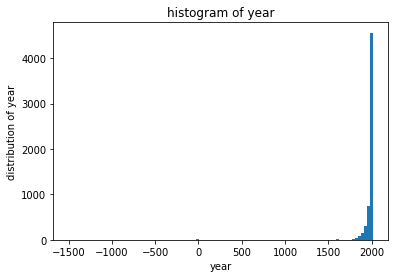

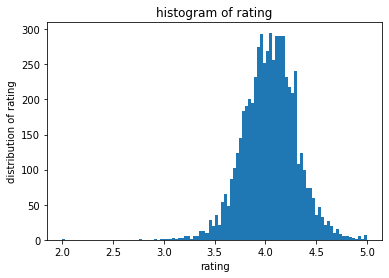

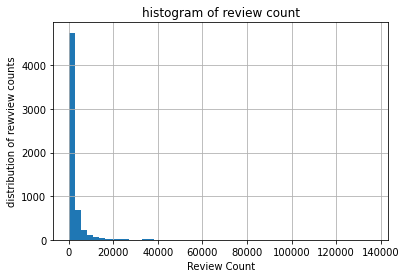

In [241]:
#Generate histograms using the format df.YOUR_CHOICE_OF_COLUMN_NAME.hist(bins=YOUR_CHOICE_OF_BIN_SIZE)

plt.hist(df['year'],bins=100)
plt.xlabel('year')
plt.ylabel('distribution of year')
plt.title('histogram of year')
plt.show()

#-----------------------------------------
plt.hist(df['rating'],bins=100)
plt.xlabel('rating')
plt.ylabel('distribution of rating')
plt.title('histogram of rating')
plt.show()

#--------------------------------------------
df.review_count.hist(bins=50)
plt.xlabel('Review Count')
plt.ylabel('distribution of rewview counts')
plt.title('histogram of review count')
plt.show()

If your histograms appear strange or counter-intuitive, make appropriate adjustments in the data and re-visualize.

In [242]:
df.at[[2442,2869,5572,5658,5683],'year'] = 2000 #making changes

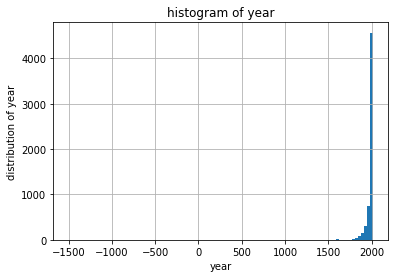

In [243]:
#Generate histograms using the format df.YOUR_CHOICE_OF_COLUMN_NAME.hist(bins=YOUR_CHOICE_OF_BIN_SIZE)
df.year.hist(bins=100)
plt.xlabel('year')
plt.ylabel('distribution of year')
plt.title('histogram of year')

plt.show()

In [244]:
df.year = df.year.abs()

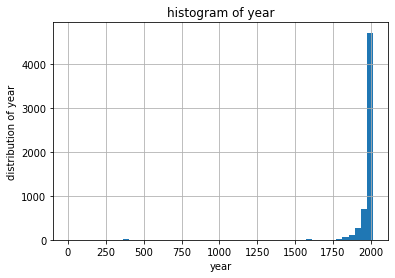

In [245]:
df.year.hist(bins=50)
plt.xlabel('year')
plt.ylabel('distribution of year')
plt.title('histogram of year')

plt.show()


## Part 5:  Determining the Best Books 

This is an example of an analysis of the "grouped property" type.

Think of some reasonable definitions of what it could mean to be a "best book." (After all, these are all the best books according to Goodreads)

[5 minutes] 

---

For example, we can determine the "best book" by year! Determine the best books in each year.

In [248]:
# df['name']=df['name'].apply(str)
df1 = df
# df.dtypes

In [249]:
#Using .groupby, we can divide the dataframe into subsets by the values of 'year'.
#We can then iterate over these subsets
bbs = {}
for year, subset in df.groupby('year'):
    #Find the best book of the year
    ####### 
    #   Insert your code
    #######
    bb = subset.sort_values(by = ['rating','review_count'],ascending=False).iloc[0]['name']
    bbs[year]=bb
    #print(year,bb.name)
print(bbs)

{4: 'The Seven Spiritual Laws of Success', 8: 'Metamorphoses', 13: 'The Day Jesus Rode Into Croydon', 29: 'The Aeneid', 100: 'The New Oxford Annotated Bible, New Revised Standard Version', 121: 'The Twelve Caesars', 130: 'Holy Bible', 158: 'The Golden Ass', 174: 'Meditations', 200: 'The Garden of Eden', 201: 'Fe Fi FOE Comes', 213: 'NaÃ¯ve. Super', 350: 'The Nicomachean Ethics', 360: 'Five Dialogues', 370: 'The Symposium', 380: 'The Republic', 390: 'Apology', 397: 'Confessions', 400: 'Complete Works', 411: 'The History of the Peloponnesian War', 429: 'Oedipus Rex', 431: 'Medea', 440: 'The Histories', 442: 'Antigone', 458: 'The Oresteia', 500: 'The Bhagavad Gita', 512: 'The Art of War', 560: "Aesop's Fables", 632: 'The Quran', 800: 'The Iliad/The Odyssey', 900: 'The Arabian Nights', 968: 'La BÃªte humaine (Les Rougon-Macquart, #17)', 1002: 'The Pillow Book', 1008: 'The Tale of Genji', 1010: 'Shahnameh', 1100: 'Rubaiyat of Omar Khayyam', 1106: 'The TÃ¡in', 1140: 'Poema de MÃ\xado Cid', 1

Try this for few other definitions of the "best book" using `.groupby`.

In [250]:
bba={}
for author,subset in df.groupby('author'):
  bb = subset.sort_values(by = ['rating'],ascending=False).iloc[0]['name']
  bba[author]=bb
print(bba)


{' ': 'Ø±Ø¨Ø§Ø¹Ù\x8aØ§Øª ØµÙ\x84Ø§Ø\xad Ø¬Ø§Ù\x87Ù\x8aÙ\x86', ' gota Krist f': 'The Notebook, The Proof, The Third Lie', ' mile Zola': 'Germinal (Les Rougon-Macquart, #13)', ' ric Emmanuel Schmitt': 'Oscar et la dame rose', ' sne Seierstad': 'The Bookseller of Kabul', 'A A Milne': 'The Complete Tales and Poems of Winnie-the-Pooh', 'A G Howard': 'Splintered (Splintered, #1)', 'A J Cronin': 'The Keys of the Kingdom', 'A J Jacobs': 'The Year of Living Biblically', 'A J Salt': 'Nik Nassa & the Mark of Destiny', 'A Meredith Walters': 'Light in the Shadows (Find You in the Dark, #2)', 'A N Roquelaure': "Beauty's Punishment (Sleeping Beauty, #2)", 'A S Byatt': 'Possession', 'A S King': 'Please Ignore Vera Dietz', 'A id al Qarni': 'Ù\x84Ø§ ØªØ\xadØ²Ù\x86', 'Abbi Glines': 'Twisted Perfection (Perfection, #1)', 'Abdul Rahman Munif': 'Ø§Ù\x84ØªÙ\x8aÙ\x87', 'Abigail Gibbs': 'Dinner With a Vampire (Dark Heroine, #1)', 'Abigail Roux': 'Touch & Geaux (Cut & Run, #7)', 'Abigail Thomas': 'A Three Dog L

## Part 6:  Trends in Popularity of Genres 

This is an example of an analysis of the "grouped property" type.

There are a lot of questions you could ask about genres.
* Which genre is currently the most popular?
* Better, based on our data, what conclusions can you draw about the time evolution of the popularity of each genre?

[15 minutes]

---

First we need to find the distinct genres in the dataframe. 

To do this, notice that each string is a pipe (|) separated list of genres. For each string, we ask if the genre is in that pipe separated list.  If it is, we return True, else False

**Hint: remember that python sets have unique (non-repeating) items.**

In [251]:
#Get the unique genres contained in the dataframe.
####### 
#   Insert your code
####### 
gens = df['genres'].tolist()
#print(gens)
u_g=set()
for i in gens:
  j = i.strip().split('|')
  for k in j:
    u_g.add(k)
u_g.remove("")
print(len(u_g))

529


In [ ]:
mis=[]
for i in range(len(df)):
  if df.iloc[i].isna().any():
    mis.append(i)
df.iloc[mis,:]

What happens if we add a column to the dataframe for each genre? 

Ans:too much complication

Is this way of representing genre efficient? Allows for easy computation and visualization?

Ans:its inefficient

Are there other ways to represent genre information in the dataframe that allow for each visualization?

Ans:no,each book has multiple genres

In [253]:
for i in u_g:
  df[i] = np.nan



In [261]:
#Add a column for each genre
####### 
#   Insert your code
#######


for i in range(len(df)):
  
  genre = df.iloc[i]['genres']
  #print(genre)
  if genre !="":
      for j in u_g:
        if j in genre:
          df.at[i,j]=1
        else:
          df.at[i,j]=0



print(df)

df.shape

      rating  review_count        isbn         booktype                                         author_url    year                                         genre_urls                                                dir  rating_count                                               name           author                                             genres  maritime  comic-strips  baseball  modern-classics  storytime  science-fiction  americana  adult-fiction  rabbits  holocaust  literary-fiction  \
0       4.40      136455.0  0439023483  good_reads:book  https://www.goodreads.com/author/show/153394.S...  2008.0  /genres/young-adult|/genres/science-fiction|/g...                dir01/2767052-the-hunger-games.html     2958974.0            The Hunger Games (The Hunger Games, #1)  Suzanne Collins  young-adult|science-fiction|dystopia|fantasy|s...       0.0           0.0       0.0              0.0        0.0              1.0        0.0            0.0      0.0        0.0               0.0   
1       

(6000, 541)

In [263]:
if df.shape[0]==6000:
  df = df.drop([3643,5282],axis=0) # removed due to all columns being Nan

In [264]:
df.shape

(5998, 541)

In [265]:
for i in u_g:
  df[i] = df[i].fillna(0)

In [266]:
mis=[]
for i in range(len(df)):
  if df.iloc[i].isna().any():
    mis.append(i)
df.iloc[mis,:]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name,author,genres,maritime,comic-strips,baseball,modern-classics,storytime,science-fiction,americana,adult-fiction,rabbits,holocaust,literary-fiction,medieval-romance,wizards,games,menage,banned-books,birds,self-help,criticism,trans,memoir,book-club,russia,anime,teen,sports-romance,contemporary-romance,time-travel-romance,marvel,popular-science,chick-lit,erotic-historical-romance,literary-criticism,american-civil-war,italian-literature,regency,neuroscience,christian,...,horses,poverty,india,productivity,cyberpunk,coming-of-age,young-adult-contemporary,adolescence,espionage,tragedy,australia,nobel-prize,splatterpunk,medicine,urbanism,academic,school-stories,sword-and-sorcery,fat-studies,japan,werewolves,new-york,unicorns,greece,young-adult-historical-fiction,harlequin,epic-poetry,urban-planning,female-authors,fat,leadership,essays,pirates,european-literature,political-science,category-romance,military-history,fantasy-romance,serbian-literature,photography,15th-century,asian-literature,military,poland,romania,drama,16th-century,race,islam,books-about-books


Now explore some ways to visualize the genres represented in the dataframe. 

For example, you might ask which is the most represented genre.

In [279]:
#Explore different ways to visualize information about the genres in the dataframe
####### 
#   Insert your code
#######

#columns = []
#most_pop=0
summ = df.sum()
#print(summ)
gen_count = {}
for i in u_g:
  gen_count[i]=summ[i]

sor = {k: v for k, v in sorted(gen_count.items(),reverse=True, key=lambda item: item[1])}

for i in sor.keys():
  print(i +" = "+ str(sor[i]))

# columns =list(u_g)[:10]
# plt.pcolor(df)
# plt.yticks(np.arange(0.5, len(df.columns), 1), df.columns)
# plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
# plt.show()

fiction = 5095.0
adult = 3090.0
fantasy = 2609.0
roman = 1977.0
young-adult = 1953.0
romance = 1942.0
literature = 1827.0
classics = 1554.0
novels = 1546.0
science = 1346.0
science-fiction = 1241.0
contemporary = 1152.0
historical-fiction = 1151.0
adventure = 1136.0
paranormal = 1094.0
mystery = 979.0
book-club = 912.0
cultural = 837.0
magic = 822.0
european-literature = 754.0
science-fiction-fantasy = 719.0
supernatural = 706.0
childrens = 701.0
teen = 682.0
urban-fantasy = 663.0
adult-fiction = 640.0
thriller = 571.0
non-fiction = 564.0
paranormal-romance = 557.0
american = 555.0
humor = 537.0
womens = 524.0
womens-fiction = 484.0
horror = 484.0
chick-lit = 483.0
school = 451.0
literary-fiction = 420.0
vampires = 417.0
academic = 413.0
british-literature = 398.0
history = 381.0
philosophy = 363.0
realistic-fiction = 361.0
crime = 352.0
suspense = 337.0
drama = 333.0
middle-grade = 320.0
biography = 315.0
war = 297.0
dystopia = 292.0
religion = 288.0
high-fantasy = 281.0
epic = 276.0


<img src='https://drive.google.com/uc?id=1qGKtnY0ngnzVGC_WaxuRLyVnqO6UCOSy'>

The above image will give you give insights and you can check the genres with your own numbers.



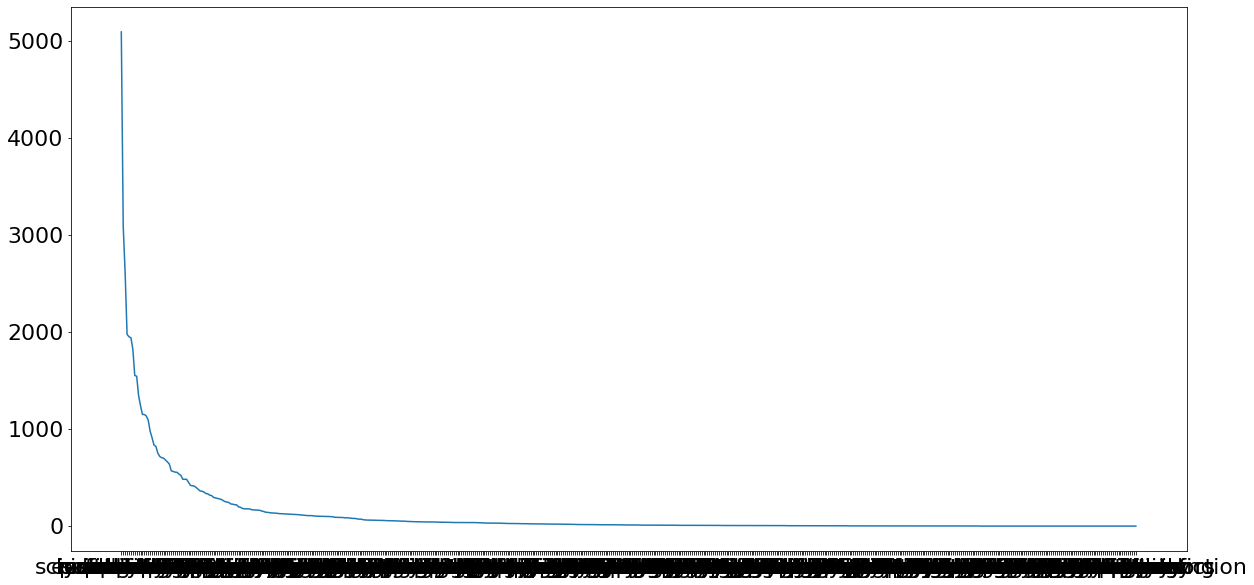

In [298]:
x = list(sor.keys())
y = list(sor.values())

plt.figure(figsize=(20,10))
plt.plot(x,y)
plt.show()


### Part 6.1: What can you conclude from the above visualizations?

Pick two or three genres and describe how the popularity of these genres fluctuates with time.  

In [ ]:
#most popular genre is fiction

There is a category called Paranormal Romance!!!!!